In [0]:
import warnings
warnings.filterwarnings("ignore")  

import pandas as pd
from bs4 import BeautifulSoup

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer #stemmer

from sklearn.feature_extraction.text import CountVectorizer #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer #For TF-IDF
from gensim.models import Word2Vec                          #For Word2Vec

import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

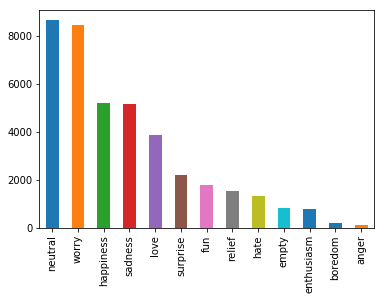

In [0]:
dataframes = {
    "tweets": pd.read_csv("../content/drive/My Drive/Colab Notebooks/crowdflower.csv")
}

dataframes["tweets"]["sentiment"].value_counts().plot(kind='bar');
dataframes["tweets"]["sentiment"].value_counts()

In [0]:
print(dataframes["tweets"].iloc[1])

tweet_id                                            1956967666
sentiment                                              sadness
author                                               wannamama
content      Layin n bed with a headache  ughhhh...waitin o...
Name: 1, dtype: object


In [0]:
uri_re = r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'

def stripTagsAndUris(x):
    if x:
        # BeautifulSoup on content
        soup = BeautifulSoup(x, "html.parser")
        # Stripping all <code> tags with their content if any
        if soup.code:
            soup.code.decompose()
        # Get all the text out of the html
        text =  soup.get_text()
        # Returning text stripping out all uris
        return re.sub(uri_re, "", text)
    else:
        return ""

def removePunctuation(x):
    # Lowercasing all words
    x = x.lower()
    # Removing non ASCII chars
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    # Removing (replacing with empty spaces actually) all the punctuations
    return re.sub("["+string.punctuation+"]", " ", x)

snow = nltk.stem.SnowballStemmer('english')
stops = set(stopwords.words("english"))
def stemAndRemoveStopwords(x):
    # Removing all the stopwords
    filtered_words = [snow.stem(word) for word in x.split() if word not in stops]
    return " ".join(filtered_words)
    
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)    
    return input_txt

switch_Emotions = {
    #happy angry sad neutral
    #anger boredom empty enthusiasm fun happiness hate love neutral relief sadness surprise worry
        "happy": "happy",
        "angry": "angry",
        "sad": "sad",
        "neutral": "neutral",
    
        "anger": "angry",
        "boredom": "neutral",
        "empty": "neutral",
        "enthusiasm": "happy",
        "fun": "happy",
        "happiness": "happy",
        "hate": "angry",
        "love": "happy",
        "relief": "happy",
        "sadness": "sad",
    
        "surprise": "sad",
        "worry" : "angry"
    }

switch_Emotions_simple = {
    #happy angry sad neutral
    #anger boredom empty enthusiasm fun happiness hate love neutral relief sadness surprise worry
        "happy": "happy",
        "angry": "angry",
        "sad": "sad",
        "neutral": "neutral",
    
        "boredom": "boredom",
        "empty": "empty",
        "enthusiasm": "enthusiasm",
        "relief": "relief",
        "surprise": "surprise",
    
        "anger": "angry",
        "fun": "happy",
        "happiness": "happy",
        "hate": "angry",
        "love": "happy",
        "sadness": "sad",
    
        "worry" : "angry"
    }

In [0]:
for df in dataframes.values():
    df["content"] = np.vectorize(remove_pattern)(df["content"], "@[\w]*")
    df["content"] = df["content"].map(stripTagsAndUris)
    df["content"] = df["content"].map(removePunctuation)
    df["content"] = df["content"].map(stemAndRemoveStopwords)

    df["sentiment"] = df["sentiment"].map(switch_Emotions_simple)

tweet_id         1957118155
sentiment               sad
author       gayasarainblow
content         miss friend
Name: 654, dtype: object



happy         10827
angry          9892
neutral        8638
sad            5165
surprise       2187
relief         1526
empty           827
enthusiasm      759
boredom         179
Name: sentiment, dtype: int64

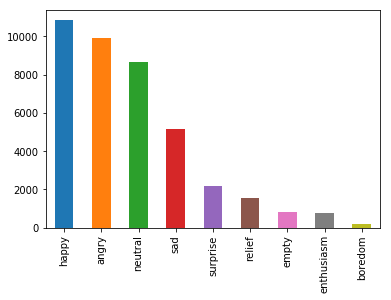

In [0]:
print(dataframes["tweets"].iloc[654])
print()
dataframes["tweets"]["sentiment"].value_counts().plot(kind='bar');
dataframes["tweets"]["sentiment"].value_counts()

In [0]:
for name, df in dataframes.items():
    # Saving to file
    df.to_csv("../content/drive/My Drive/Colab Notebooks/" + name + "_light_3.csv", index=False)

In [0]:
# Binary Bag of Words
count_vect = CountVectorizer(max_features=10000)
bow_data = count_vect.fit_transform(df["content"])
#print (bow_data[1])

# Bigram Bag of Words
#count_vect = CountVectorizer(ngram_range=(1,2))
#bbow_data = count_vect.fit_transform(df["content"])
#print (bbow_data)

In [0]:
# tf-idf
tf_idf = TfidfVectorizer(max_features=10000)
tf_data = tf_idf.fit_transform(df["content"])
print(tf_data[29312])

  (0, 2718)	0.3915024252355781
  (0, 3725)	0.24177190381107444
  (0, 7121)	0.2807133292257332
  (0, 9495)	0.4140010359311082
  (0, 424)	0.4589242130116698
  (0, 1325)	0.5722446446379581


In [0]:
# Average Word2Vec from gensim

splitted = []
for row in df["content"]: 
    splitted.append([word for word in row.split()])     #splitting words
    
train_w2v = Word2Vec(splitted,min_count=5,size=50, workers=4)

avg_data = []
for row in splitted:
    vec = np.zeros(50)
    count = 0
    for word in row:
        try:
            vec += train_w2v[word]
            count += 1
        except:
            pass
    avg_data.append(vec/count)

#print(avg_data.len)
